# 4.10 - Final Assignment - Contents

1. Importing Most Recent Data Set
2. Checking for PII
3. Creating Regional Segmentation of Data
4. Creating Exclusion Flag for Customers with less than 5 Orders
5. Profiling Data Demographics
6. Age Analysis
7. Income Analysis
8. Dependants Analysis
9. Departments Analysis
10. Regional Analysis

# Exercise 4.10 - Part 1

## Step 1 - Import most recent merged data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Define path
path = r'C:\Users\kaymi\OneDrive\Documents\05-2023-Instacart Basket Analysis'

In [3]:
# Import customer_merged
merged_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

In [4]:
# Check
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,195,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Step 2 - Consider any security implications

There is quite a bit of personally identifiable information (PII) in the data we are using for this analysis, specifically, the full names of each customer, the state they live in, their family status, income, number of dependents, etc. To address this, we should remove the first and last name of each entry.

In [5]:
# Remove First and Last Name Columns
merged_df.drop(['first_name', 'last_name'], axis = 1, inplace = True)

In [6]:
# Check
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,spending_flag,median_prior_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,195,...,Low Spender,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Low Spender,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Low Spender,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Low Spender,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Low Spender,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423


## Step 3 - Create a regional segmentation of data

In [7]:
# Check the state column
merged_df['state'].value_counts(dropna = False)

Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
New York                636697
Nevada                  636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mississi

In [8]:
# Categorize States based on Wikipedia information
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Create new Region column using "loc"
merged_df.loc[merged_df['state'].isin(Northeast),'Region'] = 'Northeast'
merged_df.loc[merged_df['state'].isin(Midwest),'Region'] = 'Midwest'
merged_df.loc[merged_df['state'].isin(South),'Region'] = 'South'
merged_df.loc[merged_df['state'].isin(West),'Region'] = 'West'

In [10]:
# Check Column created
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,median_prior_orders,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,Region
0,2539329,1,1,2,8,0.0,196,1,0,195,...,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,195,...,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,195,...,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,195,...,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,195,...,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [11]:
# Check value counts
merged_df['state'].value_counts().sum()

32434212

In [12]:
merged_df['Region'].value_counts().sum()

32434212

In [13]:
# Determine geographical differences in spending habits
crosstab = pd.crosstab(merged_df['Region'], merged_df['spending_flag'], dropna = False)

In [14]:
crosstab

spending_flag,High Spender,Low Spender
Region,,
Midwest,29344,7574466
Northeast,18735,5709612
South,40990,10760620
West,31632,8268813


In [15]:
# Create additional columns for analysis
crosstab['Total'] = crosstab.sum(axis=1)
crosstab['High spender Percentage'] = 100 * crosstab['High Spender'] / crosstab['Total']
crosstab['Low spender Percentage'] = 100 * crosstab['Low Spender'] / crosstab['Total']

In [16]:
crosstab

spending_flag,High Spender,Low Spender,Total,High spender Percentage,Low spender Percentage
Region,,,,,
Midwest,29344,7574466,7603810,0.385912,99.614088
Northeast,18735,5709612,5728347,0.327058,99.672942
South,40990,10760620,10801610,0.379480,99.620520
West,31632,8268813,8300445,0.381088,99.618912


Midwest appears to have the highest percentage of high spenders, and the north east has the lowest percentage, though the large majority of customers fall in to the "low spender" category regardless of region.

## Step 4 - Create exclusion flag for customers with less than 5 orders

In [17]:
#Decide which column to use for analysis
merged_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0_y', 'product_name',
       'aisle_id', 'department_id', 'prices', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_prior_orders', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'Region'],
      dtype='object')

In [18]:
# Create new column/flag using loc
merged_df.loc[merged_df['max_order'] >= 5, 'order_activity'] = 'High Activity Customer'
merged_df.loc[merged_df['max_order'] < 5, 'order_activity'] = 'Low Activity Customer'

In [19]:
merged_df['order_activity'].value_counts(dropna = False)

High Activity Customer    30992664
Low Activity Customer      1441548
Name: order_activity, dtype: int64

In [20]:
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,Region,order_activity
0,2539329,1,1,2,8,0.0,196,1,0,195,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customer
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customer
2,473747,1,3,3,12,21.0,196,1,1,195,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customer
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customer
4,431534,1,5,4,15,28.0,196,1,1,195,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity Customer


In [21]:
# Create subset dataframe
merged_df_subset = merged_df[merged_df['order_activity'] == 'High Activity Customer']

In [22]:
# Check
merged_df_subset['order_activity'].value_counts(dropna = False)

High Activity Customer    30992664
Name: order_activity, dtype: int64

In [23]:
# Export subset dataframe
merged_df_subset.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'E10_subset.pkl'))

## Steps 5-9 - Profiling based on age, income, department_id, number of dependants, and region

## AGE

### Setting Profiles - Young, Adult, Middle Age, Senior

In [24]:
# Check age ranges in data set
merged_df_subset['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

the minimum age in our subset is 18, and the max is 81. Will create age groups based on Senior (65+), Middle Age (40-64), and Young Adult (18-39) classifications.

In [25]:
# Create classifications using loc
merged_df_subset.loc[merged_df_subset['age']>= 65,'age_flag'] = 'Senior'
merged_df_subset.loc[(merged_df_subset['age']< 65) & (merged_df_subset['age']>= 40),'age_flag'] = 'Middle-age'
merged_df_subset.loc[merged_df_subset['age']< 40, 'age_flag'] ='Young adult'

C:\Users\kaymi\AppData\Local\Temp\ipykernel_15976\3737272132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_subset.loc[merged_df_subset['age']>= 65,'age_flag'] = 'Senior'


In [26]:
merged_df_subset['age_flag'].value_counts(dropna = False)

Middle-age     12115268
Young adult    10674650
Senior          8202746
Name: age_flag, dtype: int64

In [27]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

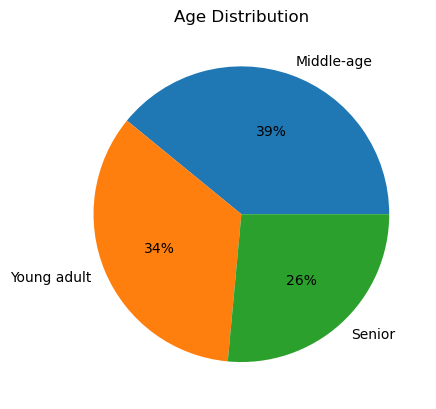

In [28]:
# Create pie chart
age_dist_pie = merged_df_subset['age_flag'].value_counts().plot.pie(title='Age Distribution',label='',autopct=('%1.f%%'))

The largest group of customers fall in the "middle-age" category

In [29]:
# Export visualizations
age_dist_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_distributions.png'))

### Age Profile Statistics - Frequency & Expenditure

In [30]:
# Age Profile Statistics - frequency and expenditure
age_statistics = merged_df_subset.groupby(['age_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum', 'min', 'max','mean']})

In [31]:
age_statistics

days_since_last_order                        prices             \
                              min   max       mean          sum  min   max   
age_flag                                                                     
Middle-age                    0.0  30.0  10.240611  94453626.86  1.0  25.0   
Senior                        0.0  30.0  10.211444  63991946.12  1.0  25.0   
Young adult                   0.0  30.0  10.233302  83148869.36  1.0  25.0   

                       
                 mean  
age_flag               
Middle-age   7.796247  
Senior       7.801283  
Young adult  7.789377

On average, senior users order the most frequently, and tend to spend the most. The differences between the groups are very minimal, however.

### Age - Regional Distribution

In [32]:
# Crosstab Region and Age Flag
region_age = pd.crosstab(merged_df_subset['Region'],merged_df_subset['age_flag'],dropna=False)

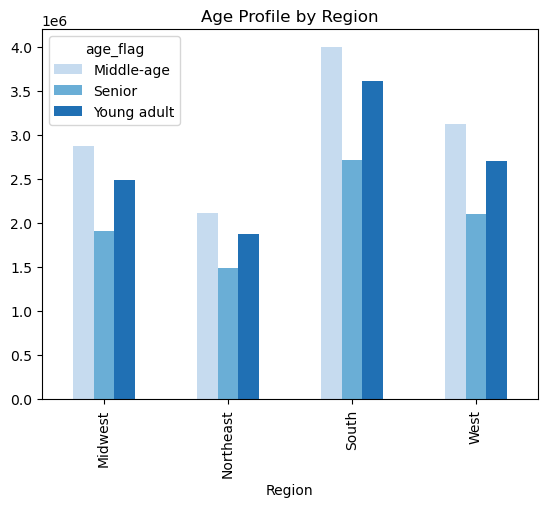

In [33]:
# Create bar chart
region_age_bar = region_age.plot.bar(color = sns.color_palette('Blues',3))
plt.title('Age Profile by Region')
plt.show()

In [34]:
# Export Visualization
region_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region_age_bar.png'))

## INCOME

### Setting Profiles - Low Income, Average Income, High Income, Affluent

In [35]:
# Check income statistics in data set
merged_df_subset['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [36]:
# Create income classifications using loc using the Pew Reasearch Center Income Classifications
merged_df_subset.loc[merged_df_subset['income']< 52200,'income_flag'] = 'Low Income'
merged_df_subset.loc[(merged_df_subset['income']>= 52200) & (merged_df_subset['income']< 156000),'income_flag'] = 'Middle Income'
merged_df_subset.loc[merged_df_subset['income']>= 156000, 'income_flag'] = 'High Income'

C:\Users\kaymi\AppData\Local\Temp\ipykernel_15976\2769192460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_subset.loc[merged_df_subset['income']< 52200,'income_flag'] = 'Low Income'


In [37]:
#Check Output
merged_df_subset['income_flag'].value_counts(dropna = False)

Middle Income    24452880
Low Income        3695708
High Income       2844076
Name: income_flag, dtype: int64

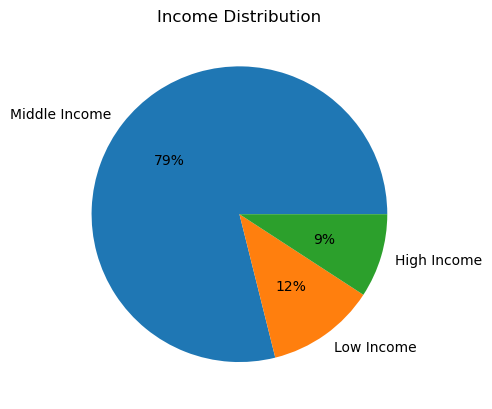

In [38]:
# Create pie chart
income_dist_pie = merged_df_subset['income_flag'].value_counts().plot.pie(title='Income Distribution',label='',autopct=('%1.f%%'))

In [39]:
# Export visualizations
income_dist_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','income_distributions.png'))

### Income Profile Statistics - Frequency & Expenditure

In [40]:
# Income Profile Statistics - frequency and expenditure
income_statistics = merged_df_subset.groupby(['income_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum', 'min', 'max','mean']})

In [41]:
income_statistics

days_since_last_order                         prices             \
                                min   max       mean           sum  min   max   
income_flag                                                                     
High Income                     0.0  30.0  10.108985  2.258604e+07  1.0  25.0   
Low Income                      0.0  30.0  10.511028  2.502789e+07  1.0  25.0   
Middle Income                   0.0  30.0  10.202076  1.939805e+08  1.0  25.0   

                         
                   mean  
income_flag              
High Income    7.941433  
Low Income     6.772150  
Middle Income  7.932829

Low income households make orders slightly less frequently than high income households, and spend on average $1.15/product less than high income households

### Income - Regional Distribution

In [42]:
#Crosstab between income and region
income_region = pd.crosstab(merged_df_subset['Region'],merged_df_subset['income_flag'],dropna=False)

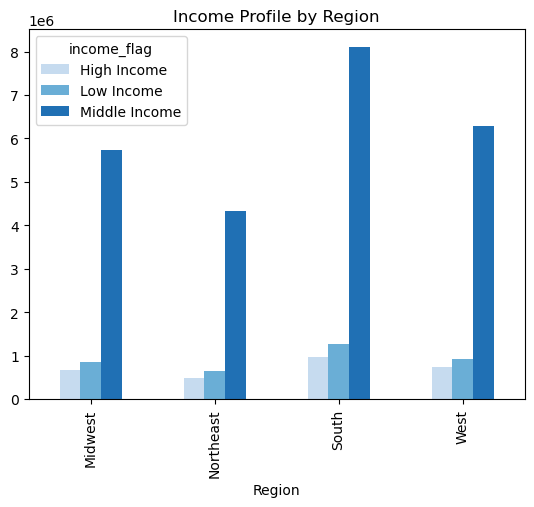

In [43]:
# Create bar chart
income_region_bar = income_region.plot.bar(color=sns.color_palette('Blues',3))
plt.title('Income Profile by Region')
plt.show()

The most high income households reside in the South, while the most low income households reside in the North East.

In [44]:
# Export Visualization
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','region_income_bar.png'))

## NUMBER OF DEPENDANTS

### Setting Profiles - Children vs No Children

In [45]:
# Check statistics in data set
merged_df_subset['n_dependants'].describe()

count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [46]:
# Create classifications based on number of dependants
merged_df_subset.loc[merged_df_subset['n_dependants']< 1,'family_flag'] = 'No Children'
merged_df_subset.loc[merged_df_subset['n_dependants']>= 1,'family_flag'] = 'Has Children'

C:\Users\kaymi\AppData\Local\Temp\ipykernel_15976\1389877622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_subset.loc[merged_df_subset['n_dependants']< 1,'family_flag'] = 'No Children'


In [47]:
merged_df_subset['family_flag'].value_counts(dropna = False)

Has Children    23245632
No Children      7747032
Name: family_flag, dtype: int64

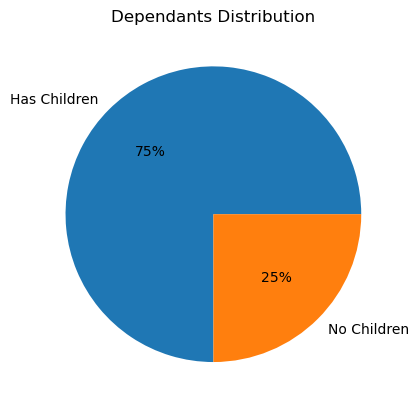

In [48]:
# Create pie chart
family_dist_pie = merged_df_subset['family_flag'].value_counts().plot.pie(title='Dependants Distribution',label='',autopct=('%1.f%%'))

In [49]:
# Export pie chart
family_dist_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dependants_distributions.png'))

### Dependants Profile Statistics - Frequency & Expenditure

In [50]:
# Dependants Profile Statistics - frequency and expenditure
dependants_statistics = merged_df_subset.groupby(['family_flag']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum', 'min', 'max','mean']})

In [51]:
dependants_statistics

days_since_last_order                         prices             \
                               min   max       mean           sum  min   max   
family_flag                                                                    
Has Children                   0.0  30.0  10.236041  1.812113e+08  1.0  25.0   
No Children                    0.0  30.0  10.213371  6.038311e+07  1.0  25.0   

                        
                  mean  
family_flag             
Has Children  7.795500  
No Children   7.794355

Interestingly, individuals without dependants spend almost the same as those that do have dependants. There is not a large difference between the groups in terms of order frequency or expenditure.

### Depedents - Regional Distribution

In [52]:
#Create Crosstab between number of dependants and region
depend_region = pd.crosstab(merged_df_subset['Region'],merged_df_subset['family_flag'],dropna=False)

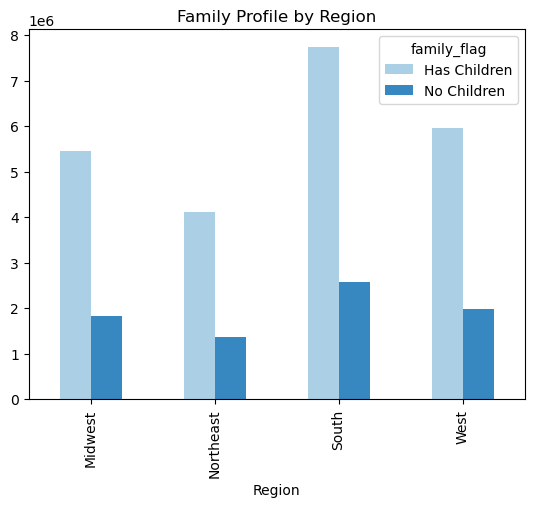

In [53]:
#Create bar chart
depend_region_bar = depend_region.plot.bar(color=sns.color_palette('Blues',2))
plt.title('Family Profile by Region')
plt.show()

In [54]:
# Export visualization
depend_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','depend_region_bar.png'))

## DEPARTMENT

### Department Profile

In [55]:
merged_df_subset.groupby('department_id').agg({'order_number' : ['mean']})

,order_number
,mean
department_id,
1,16.160536
2,18.096481
3,17.865992
4,18.495724
5,16.031865
6,17.174694
7,17.901457
8,15.996153


In [56]:
# Import Department Data
department_df =pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [57]:
# Add Department Column names to data
department_df.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [58]:
department_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [59]:
# Merge department info data 
merged_df_final = merged_df_subset.merge(department_df, on = 'department_id')

Text(0.5, 1.0, 'Department Popularity')

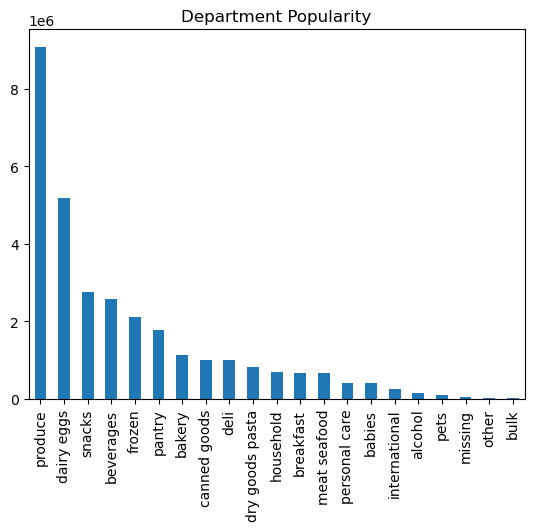

In [60]:
# Bar graph of popular departments
dept_bar = merged_df_final['department'].value_counts().plot.bar()
plt.title('Department Popularity')

In [61]:
#Export Visualization
dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dept_bar.png'))

### Analysis of Department by Family Type

In [62]:
# Create crosstab between family status and department
department_family = pd.crosstab(merged_df_final['department'],merged_df_subset['family_flag'],dropna=False)

In [63]:
department_family

family_flag,Has Children,No Children
department,,
alcohol,97920,32286
babies,270222,87303
bakery,808513,254339
beverages,1907761,619431
breakfast,489330,163162
bulk,20258,8341
canned goods,718230,225513
dairy eggs,3827808,1259426
deli,675643,219267


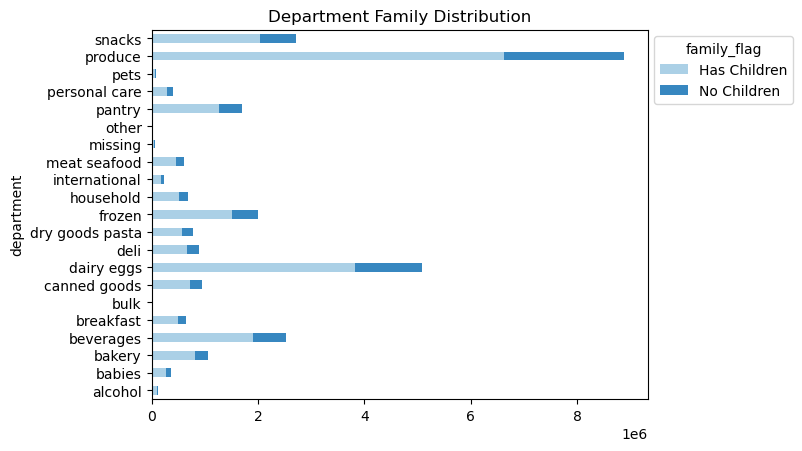

In [64]:
# Create stacked bar chart
dept_family_bar = department_family.plot.barh(stacked=True,color=sns.color_palette('Blues',2))
plt.title('Department Family Distribution')
sns.move_legend(dept_family_bar, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

In [65]:
# Export visualization
dept_family_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dept_family_bar.png'))

In [66]:
# Create additional columns for analysis
department_family['Total'] = department_family.sum(axis=1)
department_family['Has Children %'] = 100 * department_family['Has Children'] / department_family['Total']
department_family['No Children %'] = 100 * department_family['No Children'] / department_family['Total']

In [67]:
department_family

family_flag,Has Children,No Children,Total,Has Children %,No Children %
department,,,,,
alcohol,97920,32286,130206,75.203908,24.796092
babies,270222,87303,357525,75.581288,24.418712
bakery,808513,254339,1062852,76.070140,23.929860
beverages,1907761,619431,2527192,75.489357,24.510643
breakfast,489330,163162,652492,74.994023,25.005977
bulk,20258,8341,28599,70.834645,29.165355
canned goods,718230,225513,943743,76.104406,23.895594
dairy eggs,3827808,1259426,5087234,75.243403,24.756597
deli,675643,219267,894910,75.498430,24.501570


In [68]:
department_family_subset = department_family.drop(columns = ['Has Children', 'No Children', 'Total'])

In [69]:
department_family_subset

family_flag,Has Children %,No Children %
department,,
alcohol,75.203908,24.796092
babies,75.581288,24.418712
bakery,76.070140,23.929860
beverages,75.489357,24.510643
breakfast,74.994023,25.005977
bulk,70.834645,29.165355
canned goods,76.104406,23.895594
dairy eggs,75.243403,24.756597
deli,75.498430,24.501570


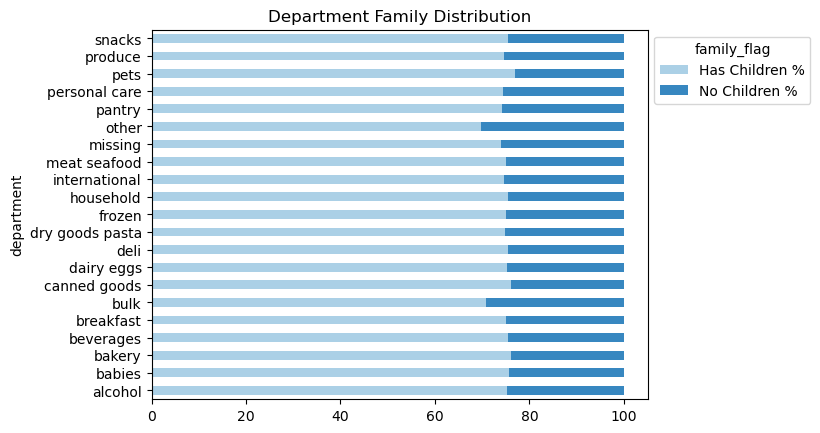

In [70]:
# Create stacked bar chart
dept_family = department_family_subset.plot.barh(stacked=True,color=sns.color_palette('Blues',2))
plt.title('Department Family Distribution')
sns.move_legend(dept_family, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

In [71]:
# Export Visualization
dept_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dept_family_stack.png'))

In [72]:
# Export subset
department_family_subset.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dept_fam_subset.pkl'))

In [73]:
# Departments Profile Statistics - frequency and expenditure
dept_statistics = merged_df_final.groupby(['department']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum', 'min', 'max','mean']})

In [74]:
dept_statistics

days_since_last_order                        prices       \
                                  min   max       mean          sum  min   
department                                                                 
alcohol                           0.0  30.0   9.332472   1179302.30  1.0   
babies                            0.0  30.0   9.335526   3133096.40  1.0   
bakery                            0.0  30.0  10.225862   8852224.60  1.0   
beverages                         0.0  30.0  10.206104  19759202.30  1.0   
breakfast                         0.0  30.0  10.389484   5470900.40  1.0   
bulk                              0.0  30.0   9.451048    279212.80  1.4   
canned goods                      0.0  30.0  10.672517   7637778.50  1.0   
dairy eggs                        0.0  30.0  10.155419  43363061.94  1.0   
deli                              0.0  30.0  10.431782   7813188.10  1.0   
dry goods pasta                   0.0  30.0  10.770432   6042181.40  1.0   
frozen                            0.0  30.0  10.740142  16431750.70  1.0   
household                         0.0  30.0  10.968798   5164912.00  1.0   
international                     0.0  30.0  10.316078   1965702.90  1.0   
meat seafood                      0.0  30.0  10.505405  10999037.00  8.0   
missing                           0.0  30.0   9.659415    560933.30  1.0   
other                             0.0  30.0  10.056842    239569.20  1.1   
pantry                            0.0  30.0  10.220274  14289860.70  1.0   
personal care                     0.0  30.0  10.604785   3394733.10  1.0   
pets                              0.0  30.0  10.939150    734083.70  1.0   
produce                           0.0  30.0  10.026067  72455790.70  1.0   
snacks                            0.0  30.0  10.108421  11827920.30  1.6   

                                  
                  max       mean  
department                        
alcohol          15.0   8.151446  
babies           15.0   7.634399  
bakery           15.0   7.868462  
beverages        15.0   7.682624  
breakfast        14.9   8.068044  
bulk             14.1   8.346919  
canned goods     15.0   7.546660  
dairy eggs       15.0   8.352176  
deli             15.0   7.783347  
dry goods pasta  15.0   7.349370  
frozen           15.0   7.738627  
household        15.0   7.379943  
international    15.0   7.678797  
meat seafood     25.0  16.300062  
missing          15.0   8.660655  
other            15.0   6.961995  
pantry           20.0   8.014940  
personal care    15.0   7.998617  
pets             15.0   7.887860  
produce          15.0   7.980349  
snacks            7.0   4.275555

### Analysis of Regional Preferences of Departments

In [75]:
department_region = pd.crosstab(merged_df_final['department'],merged_df_subset['Region'],dropna=False)

In [76]:
department_region

Region,Midwest,Northeast,South,West
department,,,,
alcohol,29795,23766,44640,32005
babies,85668,62281,117728,91848
bakery,256241,183685,354408,268518
beverages,567045,458901,853114,648132
breakfast,151201,122033,200581,178677
bulk,7823,4311,9279,7186
canned goods,235091,161091,318036,229525
dairy eggs,1199918,894864,1683960,1308492
deli,213017,151572,296795,233526


In [77]:
# Create additional columns for analysis
department_region['Total'] = department_region.sum(axis=1)
department_region['Midwest %'] = 100 * department_region['Midwest'] / department_region['Total']
department_region['Northeast %'] = 100 * department_region['Northeast'] / department_region['Total']
department_region['South %'] = 100 * department_region['South'] / department_region['Total']
department_region['West %'] = 100 * department_region['West'] / department_region['Total']

In [78]:
department_region

Region,Midwest,Northeast,South,West,Total,Midwest %,Northeast %,South %,West %
department,,,,,,,,,
alcohol,29795,23766,44640,32005,130206,22.882970,18.252615,34.284134,24.580280
babies,85668,62281,117728,91848,357525,23.961401,17.420041,32.928606,25.689952
bakery,256241,183685,354408,268518,1062852,24.108813,17.282274,33.345000,25.263913
beverages,567045,458901,853114,648132,2527192,22.437749,18.158533,33.757388,25.646330
breakfast,151201,122033,200581,178677,652492,23.172851,18.702605,30.740760,27.383784
bulk,7823,4311,9279,7186,28599,27.354103,15.073954,32.445190,25.126753
canned goods,235091,161091,318036,229525,943743,24.910489,17.069372,33.699429,24.320710
dairy eggs,1199918,894864,1683960,1308492,5087234,23.586845,17.590384,33.101682,25.721089
deli,213017,151572,296795,233526,894910,23.803176,16.937122,33.164788,26.094915


In [79]:
#Create subset
department_region_subset = department_region.drop(columns = ['Midwest', 'Northeast','South', 'West','Total'])

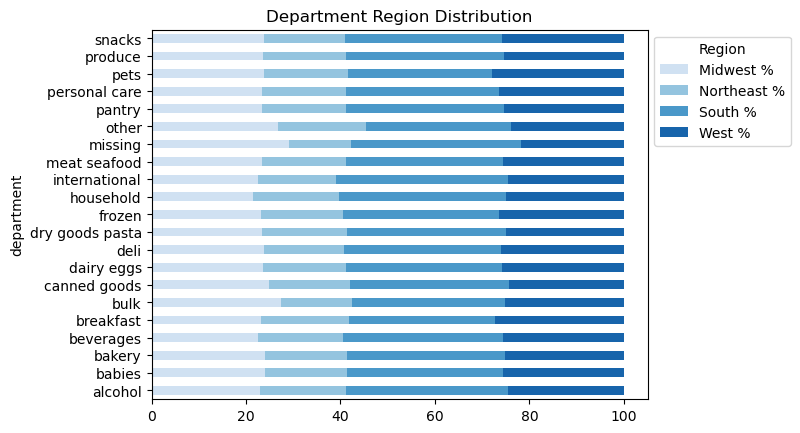

In [80]:
#Create stacked bar chart
dept_region = department_region_subset.plot.barh(stacked=True,color=sns.color_palette('Blues',4))
plt.title('Department Region Distribution')
sns.move_legend(dept_region, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

In [81]:
# Export visualization
dept_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dept_region_stack.png'))

In [82]:
# Export subset
department_region_subset.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dept_region_subset.pkl'))

### Regional Differences between Days Since Last Order and Prices

In [83]:
Region_statistics = merged_df_subset.groupby(['Region']).agg({'days_since_last_order':['min','max','mean'],'prices':['sum', 'min', 'max','mean']})

In [84]:
Region_statistics

days_since_last_order                        prices             \
                            min   max       mean          sum  min   max   
Region                                                                     
Midwest                     0.0  30.0  10.303201  56663715.88  1.0  25.0   
Northeast                   0.0  30.0  10.199079  42592598.56  1.0  25.0   
South                       0.0  30.0  10.233011  80489397.50  1.0  25.0   
West                        0.0  30.0  10.181812  61848730.40  1.0  25.0   

                     
               mean  
Region               
Midwest    7.796643  
Northeast  7.786484  
South      7.799011  
West       7.794984

In [85]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30992664 entries, 0 to 30992663
Data columns (total 38 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int64  
 1   user_id                object 
 2   order_number           int64  
 3   orders_day_of_week     int64  
 4   order_hour_of_day      int64  
 5   days_since_last_order  float64
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   Unnamed: 0_y           int64  
 10  product_name           object 
 11  aisle_id               int64  
 12  department_id          int64  
 13  prices                 float64
 14   price_range_loc       object 
 15  price_range_loc        object 
 16  busiest_day            object 
 17  busiest_days           object 
 18  busiest_period_of_day  object 
 19  max_order              int64  
 20  loyalty_flag           object 
 21  average_price          float64
 22  spending_flag   

## Step 10 - Exporting Final Dataframe

In [86]:
# Export Final Dataframe
merged_df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe.pkl'))